**Created by Sanskar Hasija**

**[TPS-FEB-22] 📊EDA + Modelling📈**

**01 February 2022**


# <center> [TPS-FEB-22] 📊EDA + Modelling📈 </center>
## <center>If you find this notebook useful, support with an upvote👍</center>

# Table of Contents
<a id="toc"></a>
- [1. Introduction](#1)
- [2. Imports](#2)
- [3. Data Loading and Preperation](#3)
    - [3.1 Exploring Train Data](#3.1)
    - [3.2 Exploring Test Data](#3.2)
    - [3.3 Submission File](#3.3)
- [4. EDA](#4)
    - [4.1 Overview of Data](#4.1)
    - [4.2 Null Value Distribution](#4.7)
    - [4.3 Continuos and Categorical Data Distribution](#4.2)
    - [4.4 Feature Distribution of Continous Features](#4.3)
    - [4.5 Feature Distribution of Categorical Features](#4.4)
    - [4.6 Target Distribution ](#4.5)
- [5. Feature Engineering](#5)   
- [6. Modelling](#6)
    - [6.1 LGBM Classifier](#6.1)
    - [6.2 Catboost Classifier](#6.2)
    - [6.3 XGBoost Classifier](#6.3)
- [7. Submission](#7)   

<a id="1"></a>
# Introduction

**The task of this compeition is to classify 10 different bacteria species using data from a genomic analysis technique that has some data compression and data loss. The dataset used for this compeition is derived from this [paper](https://www.frontiersin.org/articles/10.3389/fmicb.2020.00257/full).**

**Submissions are evaluated based on their categorization accuracy..**

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="2"></a>
# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from scipy.stats import mode


from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


from matplotlib import ticker
import time
import warnings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format)
warnings.filterwarnings('ignore')


RANDOM_STATE = 12 
FOLDS = 5

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="3"></a>
# Data Loading and Preperation

In [2]:
train = pd.read_csv("../input/tabular-playground-series-feb-2022/train.csv")
test = pd.read_csv("../input/tabular-playground-series-feb-2022/test.csv")
submission = pd.read_csv("../input/tabular-playground-series-feb-2022/sample_submission.csv")

<a id="3.1"></a>
## Exploring Train Data

### Observations:

* There are total of ```288``` columns : ```278``` continous , ```8``` categorical ```1``` row_id and ```1``` target column
* There are total of `200000` rows in train dataset.
* ```target``` is the target variable which is only available in the ```train``` dataset.
* Train dataset contain ```57600000``` observation with ```0```  missing / null values.
* No `NULL` Values 🙂

### Quick view of Train Data

Below is the first 5 rows of train dataset:

In [3]:
train.head()

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,A0T0G10C0,A0T1G0C9,A0T1G1C8,A0T1G2C7,A0T1G3C6,A0T1G4C5,A0T1G5C4,A0T1G6C3,A0T1G7C2,A0T1G8C1,A0T1G9C0,A0T2G0C8,A0T2G1C7,A0T2G2C6,A0T2G3C5,A0T2G4C4,A0T2G5C3,A0T2G6C2,A0T2G7C1,A0T2G8C0,A0T3G0C7,A0T3G1C6,A0T3G2C5,A0T3G3C4,A0T3G4C3,A0T3G5C2,A0T3G6C1,A0T3G7C0,A0T4G0C6,A0T4G1C5,A0T4G2C4,A0T4G3C3,A0T4G4C2,A0T4G5C1,A0T4G6C0,A0T5G0C5,A0T5G1C4,A0T5G2C3,A0T5G3C2,A0T5G4C1,A0T5G5C0,A0T6G0C4,A0T6G1C3,A0T6G2C2,A0T6G3C1,A0T6G4C0,A0T7G0C3,A0T7G1C2,A0T7G2C1,A0T7G3C0,A0T8G0C2,A0T8G1C1,A0T8G2C0,A0T9G0C1,A0T9G1C0,A0T10G0C0,A1T0G0C9,A1T0G1C8,A1T0G2C7,A1T0G3C6,A1T0G4C5,A1T0G5C4,A1T0G6C3,A1T0G7C2,A1T0G8C1,A1T0G9C0,A1T1G0C8,A1T1G1C7,A1T1G2C6,A1T1G3C5,A1T1G4C4,A1T1G5C3,A1T1G6C2,A1T1G7C1,A1T1G8C0,A1T2G0C7,A1T2G1C6,A1T2G2C5,A1T2G3C4,A1T2G4C3,A1T2G5C2,A1T2G6C1,A1T2G7C0,A1T3G0C6,A1T3G1C5,A1T3G2C4,A1T3G3C3,A1T3G4C2,A1T3G5C1,A1T3G6C0,A1T4G0C5,A1T4G1C4,A1T4G2C3,A1T4G3C2,A1T4G4C1,A1T4G5C0,A1T5G0C4,A1T5G1C3,A1T5G2C2,A1T5G3C1,A1T5G4C0,A1T6G0C3,A1T6G1C2,A1T6G2C1,A1T6G3C0,A1T7G0C2,A1T7G1C1,A1T7G2C0,A1T8G0C1,A1T8G1C0,A1T9G0C0,A2T0G0C8,A2T0G1C7,A2T0G2C6,A2T0G3C5,A2T0G4C4,A2T0G5C3,A2T0G6C2,A2T0G7C1,A2T0G8C0,A2T1G0C7,A2T1G1C6,A2T1G2C5,A2T1G3C4,A2T1G4C3,A2T1G5C2,A2T1G6C1,A2T1G7C0,A2T2G0C6,A2T2G1C5,A2T2G2C4,A2T2G3C3,A2T2G4C2,A2T2G5C1,A2T2G6C0,A2T3G0C5,A2T3G1C4,A2T3G2C3,A2T3G3C2,A2T3G4C1,A2T3G5C0,A2T4G0C4,A2T4G1C3,A2T4G2C2,A2T4G3C1,A2T4G4C0,A2T5G0C3,A2T5G1C2,A2T5G2C1,A2T5G3C0,A2T6G0C2,A2T6G1C1,A2T6G2C0,A2T7G0C1,A2T7G1C0,A2T8G0C0,A3T0G0C7,A3T0G1C6,A3T0G2C5,A3T0G3C4,A3T0G4C3,A3T0G5C2,A3T0G6C1,A3T0G7C0,A3T1G0C6,A3T1G1C5,A3T1G2C4,A3T1G3C3,A3T1G4C2,A3T1G5C1,A3T1G6C0,A3T2G0C5,A3T2G1C4,A3T2G2C3,A3T2G3C2,A3T2G4C1,A3T2G5C0,A3T3G0C4,A3T3G1C3,A3T3G2C2,A3T3G3C1,A3T3G4C0,A3T4G0C3,A3T4G1C2,A3T4G2C1,A3T4G3C0,A3T5G0C2,A3T5G1C1,A3T5G2C0,A3T6G0C1,A3T6G1C0,A3T7G0C0,A4T0G0C6,A4T0G1C5,A4T0G2C4,A4T0G3C3,A4T0G4C2,A4T0G5C1,A4T0G6C0,A4T1G0C5,A4T1G1C4,A4T1G2C3,A4T1G3C2,A4T1G4C1,A4T1G5C0,A4T2G0C4,A4T2G1C3,A4T2G2C2,A4T2G3C1,A4T2G4C0,A4T3G0C3,A4T3G1C2,A4T3G2C1,A4T3G3C0,A4T4G0C2,A4T4G1C1,A4T4G2C0,A4T5G0C1,A4T5G1C0,A4T6G0C0,A5T0G0C5,A5T0G1C4,A5T0G2C3,A5T0G3C2,A5T0G4C1,A5T0G5C0,A5T1G0C4,A5T1G1C3,A5T1G2C2,A5T1G3C1,A5T1G4C0,A5T2G0C3,A5T2G1C2,A5T2G2C1,A5T2G3C0,A5T3G0C2,A5T3G1C1,A5T3G2C0,A5T4G0C1,A5T4G1C0,A5T5G0C0,A6T0G0C4,A6T0G1C3,A6T0G2C2,A6T0G3C1,A6T0G4C0,A6T1G0C3,A6T1G1C2,A6T1G2C1,A6T1G3C0,A6T2G0C2,A6T2G1C1,A6T2G2C0,A6T3G0C1,A6T3G1C0,A6T4G0C0,A7T0G0C3,A7T0G1C2,A7T0G2C1,A7T0G3C0,A7T1G0C2,A7T1G1C1,A7T1G2C0,A7T2G0C1,A7T2G1C0,A7T3G0C0,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0,target
0,0,-0.000001,-0.000010,-0.000043,-0.000114,-0.000200,-0.000240,-0.000200,-0.000114,-0.000043,-0.000010,-0.000001,-0.000010,-0.000086,-0.000343,-0.000801,-0.001202,-0.001202,-0.000801,-0.000343,-0.000086,-0.000010,-0.000043,-0.000343,-0.001202,-0.002403,-0.003004,-0.002403,-0.001202,-0.000343,-0.000043,-0.000114,-0.000801,-0.002403,-0.004005,-0.004005,-0.002403,-0.000801,-0.000114,-0.000200,-0.001202,-0.003004,-0.004005,-0.003004,-0.001202,-0.000200,-0.000240,-0.001202,-0.002403,-0.002403,-0.001202,-0.000240,-0.000200,-0.000801,-0.001202,-0.000801,-0.000200,-0.000114,-0.000343,-0.000343,-0.000114,-0.000043,-0.000086,-0.000043,-0.000010,-0.000010,-0.000001,-0.000010,-0.000086,-0.000343,-0.000801,-0.001202,-0.001202,-0.000801,-0.000343,-0.000086,-0.000010,-0.000086,-0.000687,-0.002403,-0.004807,-0.006008,-0.004807,-0.002403,-0.000687,-0.000086,-0.000343,-0.002403,-0.007210,-0.002016,-0.012016,-0.007210,0.017597,0.009657,-0.000801,-0.004807,0.007984,-0.006022,0.007984,-0.004807,-0.000801,-0.001202,0.003992,-0.012016,-0.012016,0.003992,0.008798,-0.001202,-0.004807,0.002790,-0.004807,-0.001202,-0.000801,0.007597,0.007597,-0.000801,-0.000343,-0.000687,-0.000343,-0.000086,-0.000086,-0.000010,-0.000043,-0.000343,-0.001202,-0.002403,-0.003004,-0.002403,-0.001202,-0.000343,-0.000043,-0.000343,-0.002403,-0.007210,-0.012016,-0.002016,-0.007210,-0.002403,-0.000343,0.008798,-0.007210,0.011976,-0.01

In [4]:
print(f'\033[92mNumber of rows in train data: {train.shape[0]}')
print(f'\033[94mNumber of columns in train data: {train.shape[1]}')
print(f'\033[91mNumber of values in train data: {train.count().sum()}')
print(f'\033[91mNumber missing values in train data: {sum(train.isna().sum())}')

Number of rows in train data: 200000
Number of columns in train data: 288
Number of values in train data: 57600000
Number missing values in train data: 0


### Basic statistics of training data

Below is the basic statistics for each variables which contain information on `count`, `mean`, `standard deviation`, `minimum`, `1st quartile`, `median`, `3rd quartile` and `maximum`.

In [5]:
train.describe()

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,A0T0G10C0,A0T1G0C9,A0T1G1C8,A0T1G2C7,A0T1G3C6,A0T1G4C5,A0T1G5C4,A0T1G6C3,A0T1G7C2,A0T1G8C1,A0T1G9C0,A0T2G0C8,A0T2G1C7,A0T2G2C6,A0T2G3C5,A0T2G4C4,A0T2G5C3,A0T2G6C2,A0T2G7C1,A0T2G8C0,A0T3G0C7,A0T3G1C6,A0T3G2C5,A0T3G3C4,A0T3G4C3,A0T3G5C2,A0T3G6C1,A0T3G7C0,A0T4G0C6,A0T4G1C5,A0T4G2C4,A0T4G3C3,A0T4G4C2,A0T4G5C1,A0T4G6C0,A0T5G0C5,A0T5G1C4,A0T5G2C3,A0T5G3C2,A0T5G4C1,A0T5G5C0,A0T6G0C4,A0T6G1C3,A0T6G2C2,A0T6G3C1,A0T6G4C0,A0T7G0C3,A0T7G1C2,A0T7G2C1,A0T7G3C0,A0T8G0C2,A0T8G1C1,A0T8G2C0,A0T9G0C1,A0T9G1C0,A0T10G0C0,A1T0G0C9,A1T0G1C8,A1T0G2C7,A1T0G3C6,A1T0G4C5,A1T0G5C4,A1T0G6C3,A1T0G7C2,A1T0G8C1,A1T0G9C0,A1T1G0C8,A1T1G1C7,A1T1G2C6,A1T1G3C5,A1T1G4C4,A1T1G5C3,A1T1G6C2,A1T1G7C1,A1T1G8C0,A1T2G0C7,A1T2G1C6,A1T2G2C5,A1T2G3C4,A1T2G4C3,A1T2G5C2,A1T2G6C1,A1T2G7C0,A1T3G0C6,A1T3G1C5,A1T3G2C4,A1T3G3C3,A1T3G4C2,A1T3G5C1,A1T3G6C0,A1T4G0C5,A1T4G1C4,A1T4G2C3,A1T4G3C2,A1T4G4C1,A1T4G5C0,A1T5G0C4,A1T5G1C3,A1T5G2C2,A1T5G3C1,A1T5G4C0,A1T6G0C3,A1T6G1C2,A1T6G2C1,A1T6G3C0,A1T7G0C2,A1T7G1C1,A1T7G2C0,A1T8G0C1,A1T8G1C0,A1T9G0C0,A2T0G0C8,A2T0G1C7,A2T0G2C6,A2T0G3C5,A2T0G4C4,A2T0G5C3,A2T0G6C2,A2T0G7C1,A2T0G8C0,A2T1G0C7,A2T1G1C6,A2T1G2C5,A2T1G3C4,A2T1G4C3,A2T1G5C2,A2T1G6C1,A2T1G7C0,A2T2G0C6,A2T2G1C5,A2T2G2C4,A2T2G3C3,A2T2G4C2,A2T2G5C1,A2T2G6C0,A2T3G0C5,A2T3G1C4,A2T3G2C3,A2T3G3C2,A2T3G4C1,A2T3G5C0,A2T4G0C4,A2T4G1C3,A2T4G2C2,A2T4G3C1,A2T4G4C0,A2T5G0C3,A2T5G1C2,A2T5G2C1,A2T5G3C0,A2T6G0C2,A2T6G1C1,A2T6G2C0,A2T7G0C1,A2T7G1C0,A2T8G0C0,A3T0G0C7,A3T0G1C6,A3T0G2C5,A3T0G3C4,A3T0G4C3,A3T0G5C2,A3T0G6C1,A3T0G7C0,A3T1G0C6,A3T1G1C5,A3T1G2C4,A3T1G3C3,A3T1G4C2,A3T1G5C1,A3T1G6C0,A3T2G0C5,A3T2G1C4,A3T2G2C3,A3T2G3C2,A3T2G4C1,A3T2G5C0,A3T3G0C4,A3T3G1C3,A3T3G2C2,A3T3G3C1,A3T3G4C0,A3T4G0C3,A3T4G1C2,A3T4G2C1,A3T4G3C0,A3T5G0C2,A3T5G1C1,A3T5G2C0,A3T6G0C1,A3T6G1C0,A3T7G0C0,A4T0G0C6,A4T0G1C5,A4T0G2C4,A4T0G3C3,A4T0G4C2,A4T0G5C1,A4T0G6C0,A4T1G0C5,A4T1G1C4,A4T1G2C3,A4T1G3C2,A4T1G4C1,A4T1G5C0,A4T2G0C4,A4T2G1C3,A4T2G2C2,A4T2G3C1,A4T2G4C0,A4T3G0C3,A4T3G1C2,A4T3G2C1,A4T3G3C0,A4T4G0C2,A4T4G1C1,A4T4G2C0,A4T5G0C1,A4T5G1C0,A4T6G0C0,A5T0G0C5,A5T0G1C4,A5T0G2C3,A5T0G3C2,A5T0G4C1,A5T0G5C0,A5T1G0C4,A5T1G1C3,A5T1G2C2,A5T1G3C1,A5T1G4C0,A5T2G0C3,A5T2G1C2,A5T2G2C1,A5T2G3C0,A5T3G0C2,A5T3G1C1,A5T3G2C0,A5T4G0C1,A5T4G1C0,A5T5G0C0,A6T0G0C4,A6T0G1C3,A6T0G2C2,A6T0G3C1,A6T0G4C0,A6T1G0C3,A6T1G1C2,A6T1G2C1,A6T1G3C0,A6T2G0C2,A6T2G1C1,A6T2G2C0,A6T3G0C1,A6T3G1C0,A6T4G0C0,A7T0G0C3,A7T0G1C2,A7T0G2C1,A7T0G3C0,A7T1G0C2,A7T1G1C1,A7T1G2C0,A7T2G0C1,A7T2G1C0,A7T3G0C0,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.0

<a id="3.2"></a>
## Exploring Test Data

### Observations:

* There are total of ```287``` columns : ```278``` continous , ```8``` categorical ```1``` row_id in ```test``` dataset
* There are total of `100000` rows in test dataset.
* Test dataset contain ```28700000``` observation with ```0```  missing values.
* No `NULL` Values again. 🙂

### Quick view of Test Data

In [6]:
test.head()

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,A0T0G10C0,A0T1G0C9,A0T1G1C8,A0T1G2C7,A0T1G3C6,A0T1G4C5,A0T1G5C4,A0T1G6C3,A0T1G7C2,A0T1G8C1,A0T1G9C0,A0T2G0C8,A0T2G1C7,A0T2G2C6,A0T2G3C5,A0T2G4C4,A0T2G5C3,A0T2G6C2,A0T2G7C1,A0T2G8C0,A0T3G0C7,A0T3G1C6,A0T3G2C5,A0T3G3C4,A0T3G4C3,A0T3G5C2,A0T3G6C1,A0T3G7C0,A0T4G0C6,A0T4G1C5,A0T4G2C4,A0T4G3C3,A0T4G4C2,A0T4G5C1,A0T4G6C0,A0T5G0C5,A0T5G1C4,A0T5G2C3,A0T5G3C2,A0T5G4C1,A0T5G5C0,A0T6G0C4,A0T6G1C3,A0T6G2C2,A0T6G3C1,A0T6G4C0,A0T7G0C3,A0T7G1C2,A0T7G2C1,A0T7G3C0,A0T8G0C2,A0T8G1C1,A0T8G2C0,A0T9G0C1,A0T9G1C0,A0T10G0C0,A1T0G0C9,A1T0G1C8,A1T0G2C7,A1T0G3C6,A1T0G4C5,A1T0G5C4,A1T0G6C3,A1T0G7C2,A1T0G8C1,A1T0G9C0,A1T1G0C8,A1T1G1C7,A1T1G2C6,A1T1G3C5,A1T1G4C4,A1T1G5C3,A1T1G6C2,A1T1G7C1,A1T1G8C0,A1T2G0C7,A1T2G1C6,A1T2G2C5,A1T2G3C4,A1T2G4C3,A1T2G5C2,A1T2G6C1,A1T2G7C0,A1T3G0C6,A1T3G1C5,A1T3G2C4,A1T3G3C3,A1T3G4C2,A1T3G5C1,A1T3G6C0,A1T4G0C5,A1T4G1C4,A1T4G2C3,A1T4G3C2,A1T4G4C1,A1T4G5C0,A1T5G0C4,A1T5G1C3,A1T5G2C2,A1T5G3C1,A1T5G4C0,A1T6G0C3,A1T6G1C2,A1T6G2C1,A1T6G3C0,A1T7G0C2,A1T7G1C1,A1T7G2C0,A1T8G0C1,A1T8G1C0,A1T9G0C0,A2T0G0C8,A2T0G1C7,A2T0G2C6,A2T0G3C5,A2T0G4C4,A2T0G5C3,A2T0G6C2,A2T0G7C1,A2T0G8C0,A2T1G0C7,A2T1G1C6,A2T1G2C5,A2T1G3C4,A2T1G4C3,A2T1G5C2,A2T1G6C1,A2T1G7C0,A2T2G0C6,A2T2G1C5,A2T2G2C4,A2T2G3C3,A2T2G4C2,A2T2G5C1,A2T2G6C0,A2T3G0C5,A2T3G1C4,A2T3G2C3,A2T3G3C2,A2T3G4C1,A2T3G5C0,A2T4G0C4,A2T4G1C3,A2T4G2C2,A2T4G3C1,A2T4G4C0,A2T5G0C3,A2T5G1C2,A2T5G2C1,A2T5G3C0,A2T6G0C2,A2T6G1C1,A2T6G2C0,A2T7G0C1,A2T7G1C0,A2T8G0C0,A3T0G0C7,A3T0G1C6,A3T0G2C5,A3T0G3C4,A3T0G4C3,A3T0G5C2,A3T0G6C1,A3T0G7C0,A3T1G0C6,A3T1G1C5,A3T1G2C4,A3T1G3C3,A3T1G4C2,A3T1G5C1,A3T1G6C0,A3T2G0C5,A3T2G1C4,A3T2G2C3,A3T2G3C2,A3T2G4C1,A3T2G5C0,A3T3G0C4,A3T3G1C3,A3T3G2C2,A3T3G3C1,A3T3G4C0,A3T4G0C3,A3T4G1C2,A3T4G2C1,A3T4G3C0,A3T5G0C2,A3T5G1C1,A3T5G2C0,A3T6G0C1,A3T6G1C0,A3T7G0C0,A4T0G0C6,A4T0G1C5,A4T0G2C4,A4T0G3C3,A4T0G4C2,A4T0G5C1,A4T0G6C0,A4T1G0C5,A4T1G1C4,A4T1G2C3,A4T1G3C2,A4T1G4C1,A4T1G5C0,A4T2G0C4,A4T2G1C3,A4T2G2C2,A4T2G3C1,A4T2G4C0,A4T3G0C3,A4T3G1C2,A4T3G2C1,A4T3G3C0,A4T4G0C2,A4T4G1C1,A4T4G2C0,A4T5G0C1,A4T5G1C0,A4T6G0C0,A5T0G0C5,A5T0G1C4,A5T0G2C3,A5T0G3C2,A5T0G4C1,A5T0G5C0,A5T1G0C4,A5T1G1C3,A5T1G2C2,A5T1G3C1,A5T1G4C0,A5T2G0C3,A5T2G1C2,A5T2G2C1,A5T2G3C0,A5T3G0C2,A5T3G1C1,A5T3G2C0,A5T4G0C1,A5T4G1C0,A5T5G0C0,A6T0G0C4,A6T0G1C3,A6T0G2C2,A6T0G3C1,A6T0G4C0,A6T1G0C3,A6T1G1C2,A6T1G2C1,A6T1G3C0,A6T2G0C2,A6T2G1C1,A6T2G2C0,A6T3G0C1,A6T3G1C0,A6T4G0C0,A7T0G0C3,A7T0G1C2,A7T0G2C1,A7T0G3C0,A7T1G0C2,A7T1G1C1,A7T1G2C0,A7T2G0C1,A7T2G1C0,A7T3G0C0,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
0,200000,-0.000001,-0.000002,-0.000001,0.000024,0.000034,-0.000002,0.000021,0.000024,-0.000009,-0.000008,-0.000001,-0.000003,-0.000017,-0.000074,0.000038,0.000068,0.000164,0.000180,-0.000003,-0.000025,-0.000009,0.000004,-0.000101,-0.000171,0.000006,0.000330,0.000580,0.000228,-0.000015,-0.000016,-0.000026,-0.000146,-0.000075,0.000212,0.000565,0.000359,0.000072,-0.000005,-0.000043,-0.000110,0.000061,0.000349,0.000338,0.000163,-0.000003,0.000005,0.000050,0.000332,0.000447,0.000212,0.000016,0.000031,0.000196,0.000331,0.000261,0.000035,0.000064,0.000202,0.000175,0.000047,0.000031,0.000104,0.000026,0.000012,0.000009,-0.000001,0.000000,-0.000016,-0.000005,0.000141,0.000170,0.000091,0.000076,-0.000062,-0.000026,-0.000005,-0.000019,-0.000179,-0.000068,0.000362,0.000505,0.000449,-0.000047,-0.000148,-0.000027,-0.000092,-0.000457,-0.000095,0.000379,0.000940,0.000355,-0.000236,-0.000087,-0.000180,-0.000496,-0.000106,0.000351,0.000539,-0.000045,-0.000107,-0.000103,-0.000306,0.000241,0.000404,0.000074,-0.000065,0.000071,0.000282,0.000549,0.000418,0.000001,0.000214,0.000584,0.000592,0.000200,0.000193,0.000354,0.000146,0.000102,0.000091,0.000024,-0.000011,-0.000030,0.000263,0.000496,0.000333,0.000038,-0.000180,-0.000093,-0.000009,-0.000086,-0.000142,0.000172,0.000703,0.000237,-0.000323,-0.000412,-0.000083,-0.000231,-0.000618,-0.000275,-0.000510,-0.000272,-0.000569,-0.000264,-0.000420,-0.000990,-0.001060,-0.0

In [7]:
print(f'\033[92mNumber of rows in test data: {test.shape[0]}')
print(f'\033[94mNumber of columns in test data: {test.shape[1]}')
print(f'\033[91mNumber of values in train data: {test.count().sum()}')
print(f'\033[91mNo of rows with missing values  in test data: {sum(test.isna().sum())}')

Number of rows in test data: 100000
Number of columns in test data: 287
Number of values in train data: 28700000
No of rows with missing values  in test data: 0


### Basic statistics of test data

Below is the basic statistics for each variables which contain information on `count`, `mean`, `standard deviation`, `minimum`, `1st quartile`, `median`, `3rd quartile` and `maximum`.

In [8]:
test.describe()

,row_id,A0T0G0C10,A0T0G1C9,A0T0G2C8,A0T0G3C7,A0T0G4C6,A0T0G5C5,A0T0G6C4,A0T0G7C3,A0T0G8C2,A0T0G9C1,A0T0G10C0,A0T1G0C9,A0T1G1C8,A0T1G2C7,A0T1G3C6,A0T1G4C5,A0T1G5C4,A0T1G6C3,A0T1G7C2,A0T1G8C1,A0T1G9C0,A0T2G0C8,A0T2G1C7,A0T2G2C6,A0T2G3C5,A0T2G4C4,A0T2G5C3,A0T2G6C2,A0T2G7C1,A0T2G8C0,A0T3G0C7,A0T3G1C6,A0T3G2C5,A0T3G3C4,A0T3G4C3,A0T3G5C2,A0T3G6C1,A0T3G7C0,A0T4G0C6,A0T4G1C5,A0T4G2C4,A0T4G3C3,A0T4G4C2,A0T4G5C1,A0T4G6C0,A0T5G0C5,A0T5G1C4,A0T5G2C3,A0T5G3C2,A0T5G4C1,A0T5G5C0,A0T6G0C4,A0T6G1C3,A0T6G2C2,A0T6G3C1,A0T6G4C0,A0T7G0C3,A0T7G1C2,A0T7G2C1,A0T7G3C0,A0T8G0C2,A0T8G1C1,A0T8G2C0,A0T9G0C1,A0T9G1C0,A0T10G0C0,A1T0G0C9,A1T0G1C8,A1T0G2C7,A1T0G3C6,A1T0G4C5,A1T0G5C4,A1T0G6C3,A1T0G7C2,A1T0G8C1,A1T0G9C0,A1T1G0C8,A1T1G1C7,A1T1G2C6,A1T1G3C5,A1T1G4C4,A1T1G5C3,A1T1G6C2,A1T1G7C1,A1T1G8C0,A1T2G0C7,A1T2G1C6,A1T2G2C5,A1T2G3C4,A1T2G4C3,A1T2G5C2,A1T2G6C1,A1T2G7C0,A1T3G0C6,A1T3G1C5,A1T3G2C4,A1T3G3C3,A1T3G4C2,A1T3G5C1,A1T3G6C0,A1T4G0C5,A1T4G1C4,A1T4G2C3,A1T4G3C2,A1T4G4C1,A1T4G5C0,A1T5G0C4,A1T5G1C3,A1T5G2C2,A1T5G3C1,A1T5G4C0,A1T6G0C3,A1T6G1C2,A1T6G2C1,A1T6G3C0,A1T7G0C2,A1T7G1C1,A1T7G2C0,A1T8G0C1,A1T8G1C0,A1T9G0C0,A2T0G0C8,A2T0G1C7,A2T0G2C6,A2T0G3C5,A2T0G4C4,A2T0G5C3,A2T0G6C2,A2T0G7C1,A2T0G8C0,A2T1G0C7,A2T1G1C6,A2T1G2C5,A2T1G3C4,A2T1G4C3,A2T1G5C2,A2T1G6C1,A2T1G7C0,A2T2G0C6,A2T2G1C5,A2T2G2C4,A2T2G3C3,A2T2G4C2,A2T2G5C1,A2T2G6C0,A2T3G0C5,A2T3G1C4,A2T3G2C3,A2T3G3C2,A2T3G4C1,A2T3G5C0,A2T4G0C4,A2T4G1C3,A2T4G2C2,A2T4G3C1,A2T4G4C0,A2T5G0C3,A2T5G1C2,A2T5G2C1,A2T5G3C0,A2T6G0C2,A2T6G1C1,A2T6G2C0,A2T7G0C1,A2T7G1C0,A2T8G0C0,A3T0G0C7,A3T0G1C6,A3T0G2C5,A3T0G3C4,A3T0G4C3,A3T0G5C2,A3T0G6C1,A3T0G7C0,A3T1G0C6,A3T1G1C5,A3T1G2C4,A3T1G3C3,A3T1G4C2,A3T1G5C1,A3T1G6C0,A3T2G0C5,A3T2G1C4,A3T2G2C3,A3T2G3C2,A3T2G4C1,A3T2G5C0,A3T3G0C4,A3T3G1C3,A3T3G2C2,A3T3G3C1,A3T3G4C0,A3T4G0C3,A3T4G1C2,A3T4G2C1,A3T4G3C0,A3T5G0C2,A3T5G1C1,A3T5G2C0,A3T6G0C1,A3T6G1C0,A3T7G0C0,A4T0G0C6,A4T0G1C5,A4T0G2C4,A4T0G3C3,A4T0G4C2,A4T0G5C1,A4T0G6C0,A4T1G0C5,A4T1G1C4,A4T1G2C3,A4T1G3C2,A4T1G4C1,A4T1G5C0,A4T2G0C4,A4T2G1C3,A4T2G2C2,A4T2G3C1,A4T2G4C0,A4T3G0C3,A4T3G1C2,A4T3G2C1,A4T3G3C0,A4T4G0C2,A4T4G1C1,A4T4G2C0,A4T5G0C1,A4T5G1C0,A4T6G0C0,A5T0G0C5,A5T0G1C4,A5T0G2C3,A5T0G3C2,A5T0G4C1,A5T0G5C0,A5T1G0C4,A5T1G1C3,A5T1G2C2,A5T1G3C1,A5T1G4C0,A5T2G0C3,A5T2G1C2,A5T2G2C1,A5T2G3C0,A5T3G0C2,A5T3G1C1,A5T3G2C0,A5T4G0C1,A5T4G1C0,A5T5G0C0,A6T0G0C4,A6T0G1C3,A6T0G2C2,A6T0G3C1,A6T0G4C0,A6T1G0C3,A6T1G1C2,A6T1G2C1,A6T1G3C0,A6T2G0C2,A6T2G1C1,A6T2G2C0,A6T3G0C1,A6T3G1C0,A6T4G0C0,A7T0G0C3,A7T0G1C2,A7T0G2C1,A7T0G3C0,A7T1G0C2,A7T1G1C1,A7T1G2C0,A7T2G0C1,A7T2G1C0,A7T3G0C0,A8T0G0C2,A8T0G1C1,A8T0G2C0,A8T1G0C1,A8T1G1C0,A8T2G0C0,A9T0G0C1,A9T0G1C0,A9T1G0C0,A10T0G0C0
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0

<a id="3.3"></a>
## Submission File

### Quick view of Submission File

In [9]:
submission.head()

,row_id,target
0,200000,Streptococcus_pneumoniae
1,200001,Streptococcus_pneumoniae
2,200002,Streptococcus_pneumoniae
3,200003,Streptococcus_pneumoniae
4,200004,Streptococcus_pneumoniae


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4"></a>
# EDA

<a id="4.1"></a>
## Overview of Data

In [10]:
train.drop(["row_id"] , axis = 1 , inplace = True)
test.drop(["row_id"] , axis = 1 , inplace = True)
TARGET = 'target'
FEATURES = [col for col in train.columns if col not in ['row_id', TARGET]]
RANDOM_STATE = 12 

In [11]:
train.iloc[:, :-1].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#F8766D')\
                     .bar(subset=["mean",], color='#00BFC4')

,count,mean,std,min,25%,50%,75%,max
A3T1G3C3,200000.000000,-0.001317,0.010646,-0.016022,-0.007794,-0.002022,0.001022,0.073978
A4T3G2C1,200000.000000,0.005790,0.010366,-0.012016,-0.001165,0.002984,0.007984,0.097984
A2T2G4C2,200000.000000,-0.003407,0.009628,-0.018024,-0.009181,-0.003024,0.000089,0.061976
A4T4G1C1,200000.000000,0.006720,0.009138,-0.006008,-0.000208,0.003992,0.013992,0.073992
A2T2G3C3,200000.000000,-0.007564,0.008771,-0.024033,-0.014033,-0.007033,-0.000421,0.055967
A2T2G2C4,200000.000000,-0.003735,0.008301,-0.018024,-0.009024,-0.003024,0.000106,0.061976
A3T4G2C1,200000.000000,0.003262,0.007820,-0.012016,-0.001976,0.001770,0.007974,0.087984
A3T4G1C2,200000.000000,0.000469,0.007464,-0.012016,-0.003016,-0.000466,0.005214,0.077984
A5T0G2C3,200000.000000,0.003433,0.007352,-0.002403,-0.000133,0.000297,0.001597,0.047597
A2T3G2C3,200000.000000,-0.005521,0.007348,-0.024033,-0.009033,-0.004033,-0.001323,0.065967


<a id="4.7"></a>
## Null Value Distribution 

**Observations:**
- NO NULL VALUES 

<a id="4.2"></a>
## Continuos and Categorical Data Distribution

**Observations:**
- Out of 286 features `278` features are continous 
- The reamining`8` features are categorical. `(can be considered as categorical,since they have less than 25 unique values)`


Total number of features: 286
Number of categorical (<25 Unique Values) features: 8
Number of continuos features: 278


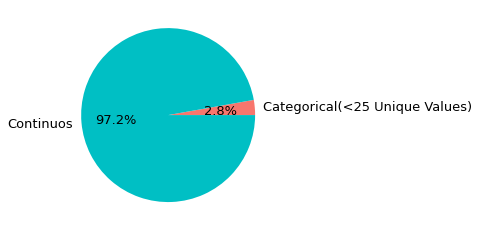

In [12]:
df = pd.concat([train[FEATURES], test[FEATURES]], axis=0)

cat_features = [col for col in FEATURES if df[col].nunique() < 25]
cont_features = [col for col in FEATURES if df[col].nunique() >= 25]

del df
print(f'Total number of features: {len(FEATURES)}')
print(f'\033[92mNumber of categorical (<25 Unique Values) features: {len(cat_features)}')
print(f'\033[96mNumber of continuos features: {len(cont_features)}')


plt.pie([len(cat_features), len(cont_features)], 
        labels=['Categorical(<25 Unique Values)', 'Continuos'],
        colors=['#F8766D', '#00BFC4'],
        textprops={'fontsize': 13},
        autopct='%1.1f%%')
plt.show()

<a id="4.3"></a>
## Feature Distribution of Continous Features

#### (NOTE : THE ABOVE DISCUSSED CATEGORICAL FEATURES ARE INCLUDED IN THE FOLLOWING CONTINUOS FEATURE DISTRIBUTION PLOTS)
### Feature Distribution of first 100 Features

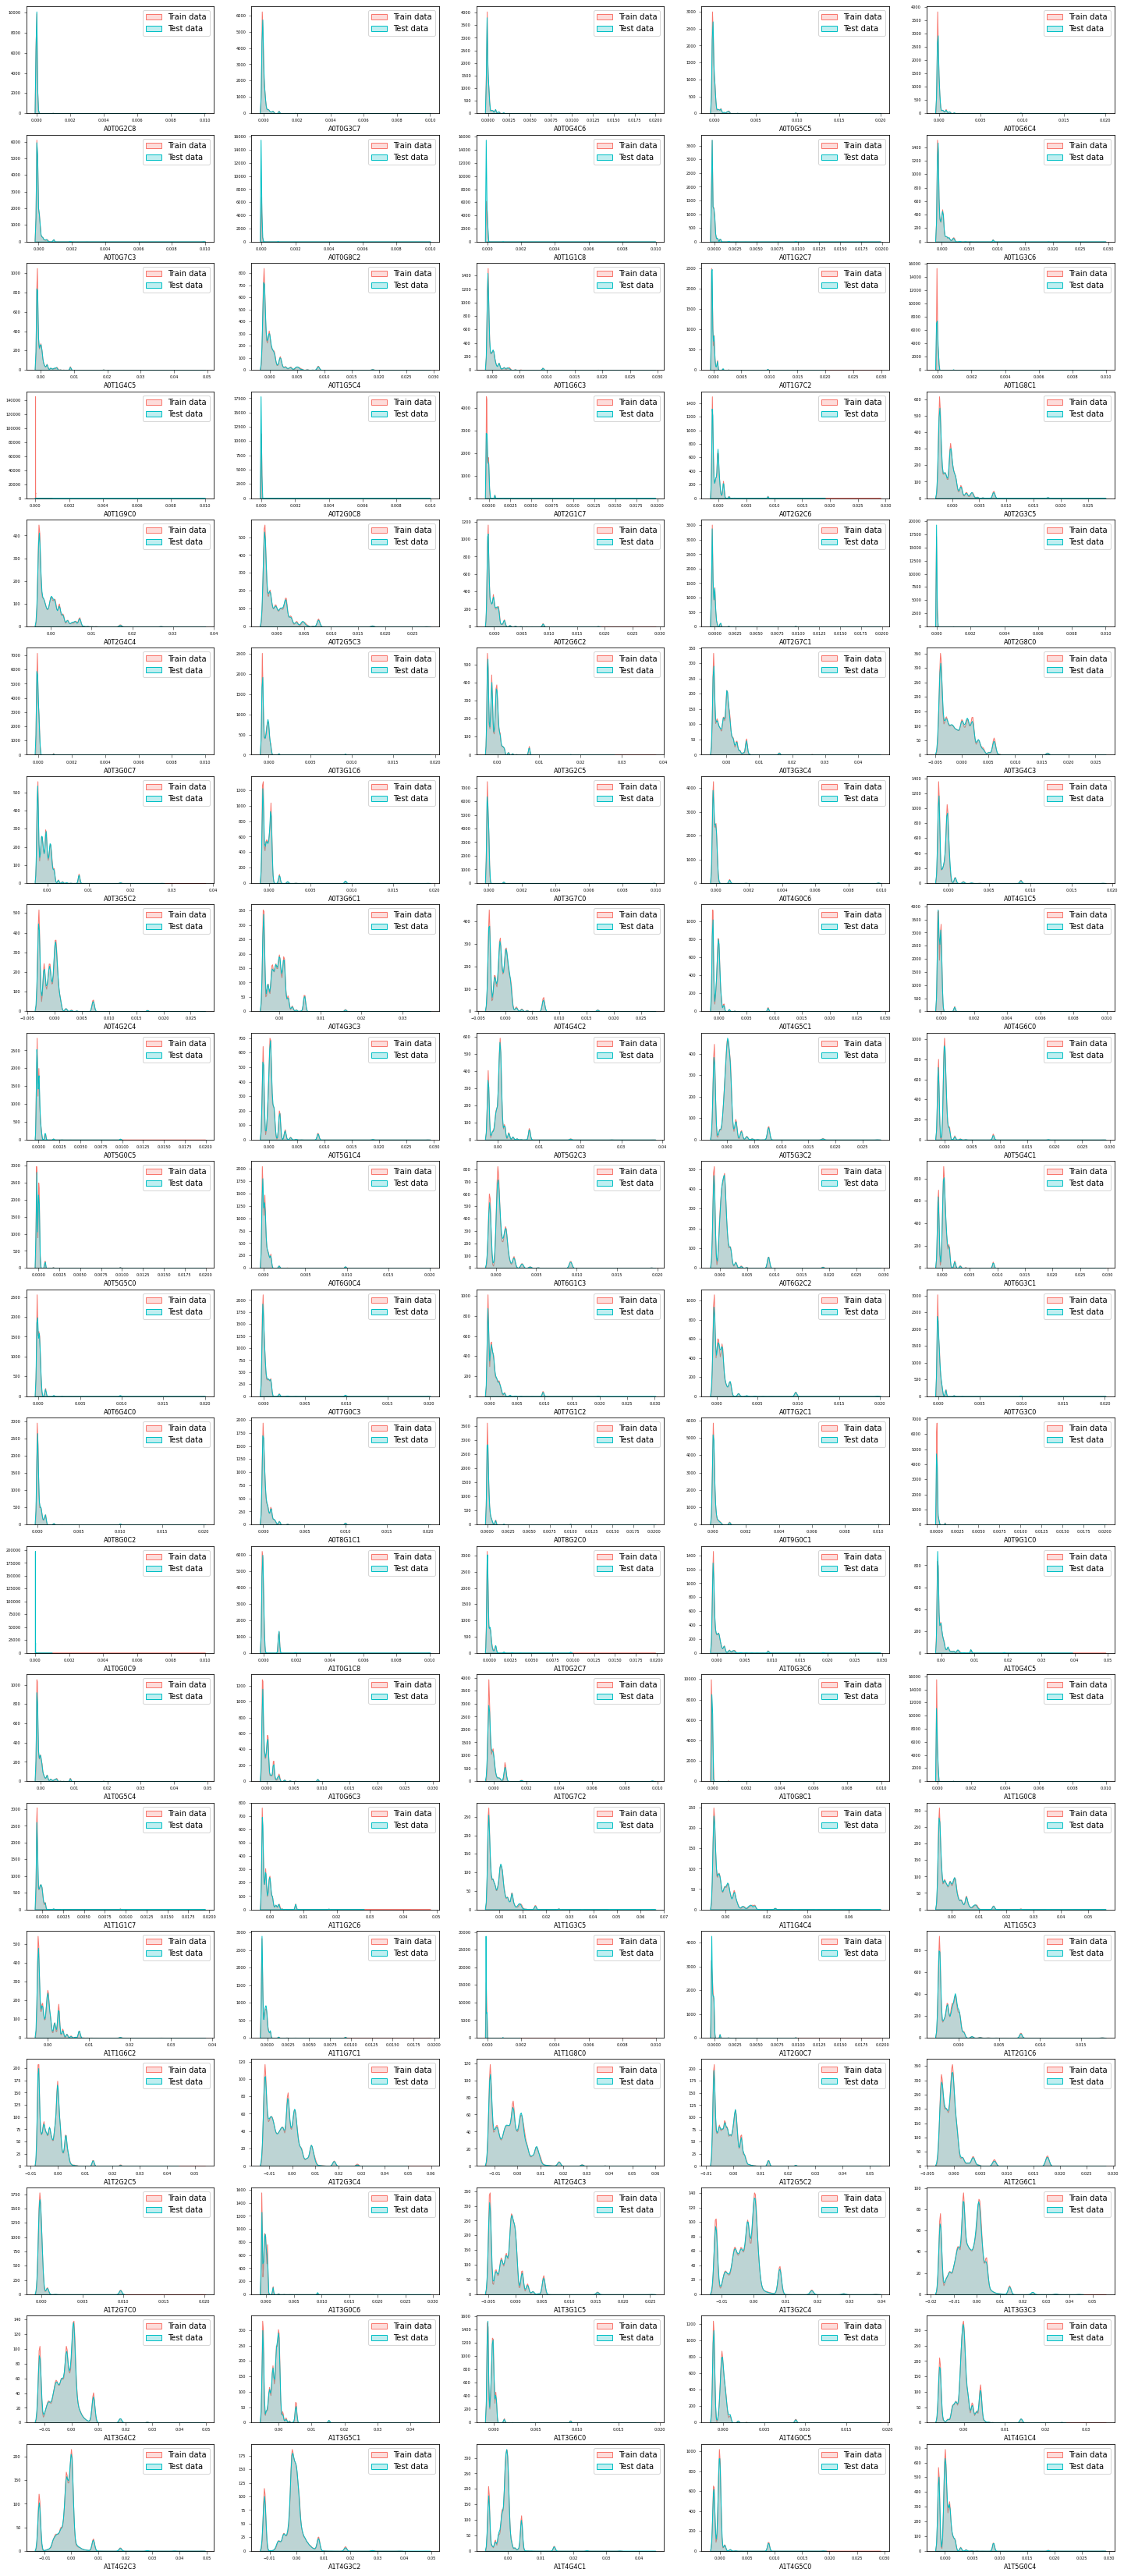

In [13]:
ncols = 5
nrows = 20
n_features = cont_features[:100]
fig, axes = plt.subplots(nrows, ncols, figsize=(25, 15*4))

for r in range(nrows):
    for c in range(ncols):
        col = n_features[r*ncols+c]
        sns.kdeplot(x=train[col], ax=axes[r, c], color='#F8766D', label='Train data' , fill =True )
        sns.kdeplot(x=test[col], ax=axes[r, c], color='#00BFC4', label='Test data', fill =True)
        axes[r,c].legend()
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=8)
        axes[r, c].tick_params(labelsize=5, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(6)
        axes[r, c].yaxis.offsetText.set_fontsize(4)
plt.show()

### Feature Distribution of 101-200 Features

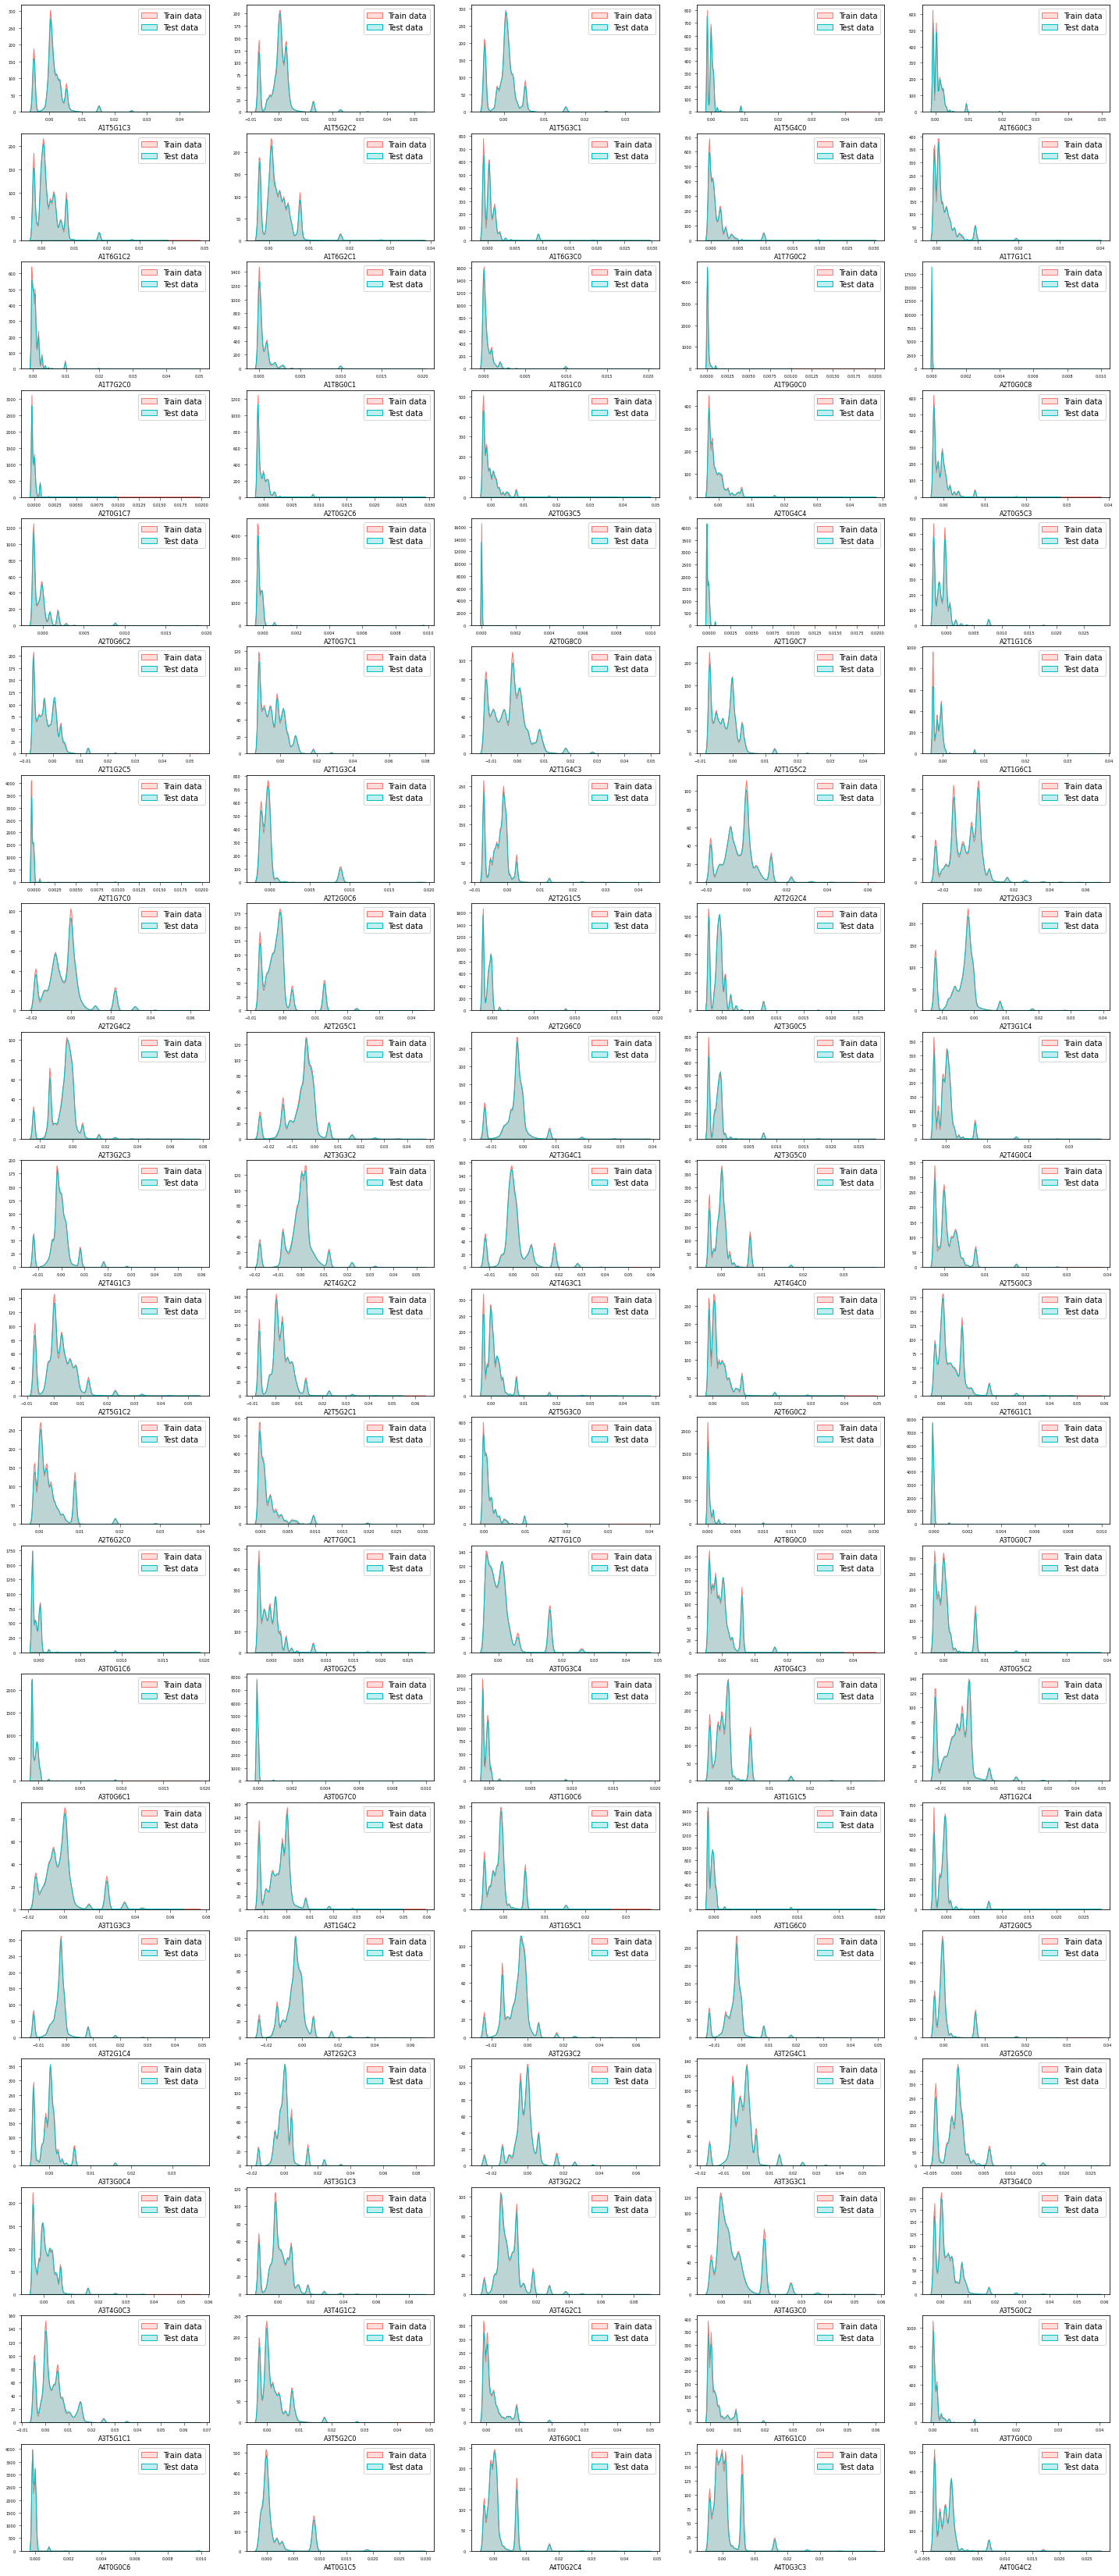

In [14]:
ncols = 5
nrows = 20
n_features = cont_features[100:200]
fig, axes = plt.subplots(nrows, ncols, figsize=(25, 60))

for r in range(nrows):
    for c in range(ncols):
        col = n_features[r*ncols+c]
        sns.kdeplot(x=train[col], ax=axes[r, c], color='#F8766D', label='Train data' , fill =True )
        sns.kdeplot(x=test[col], ax=axes[r, c], color='#00BFC4', label='Test data', fill =True)
        axes[r,c].legend()
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=8)
        axes[r, c].tick_params(labelsize=5, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(6)
        axes[r, c].yaxis.offsetText.set_fontsize(4)
plt.show()

### Feature Distribution of 201-275 Features

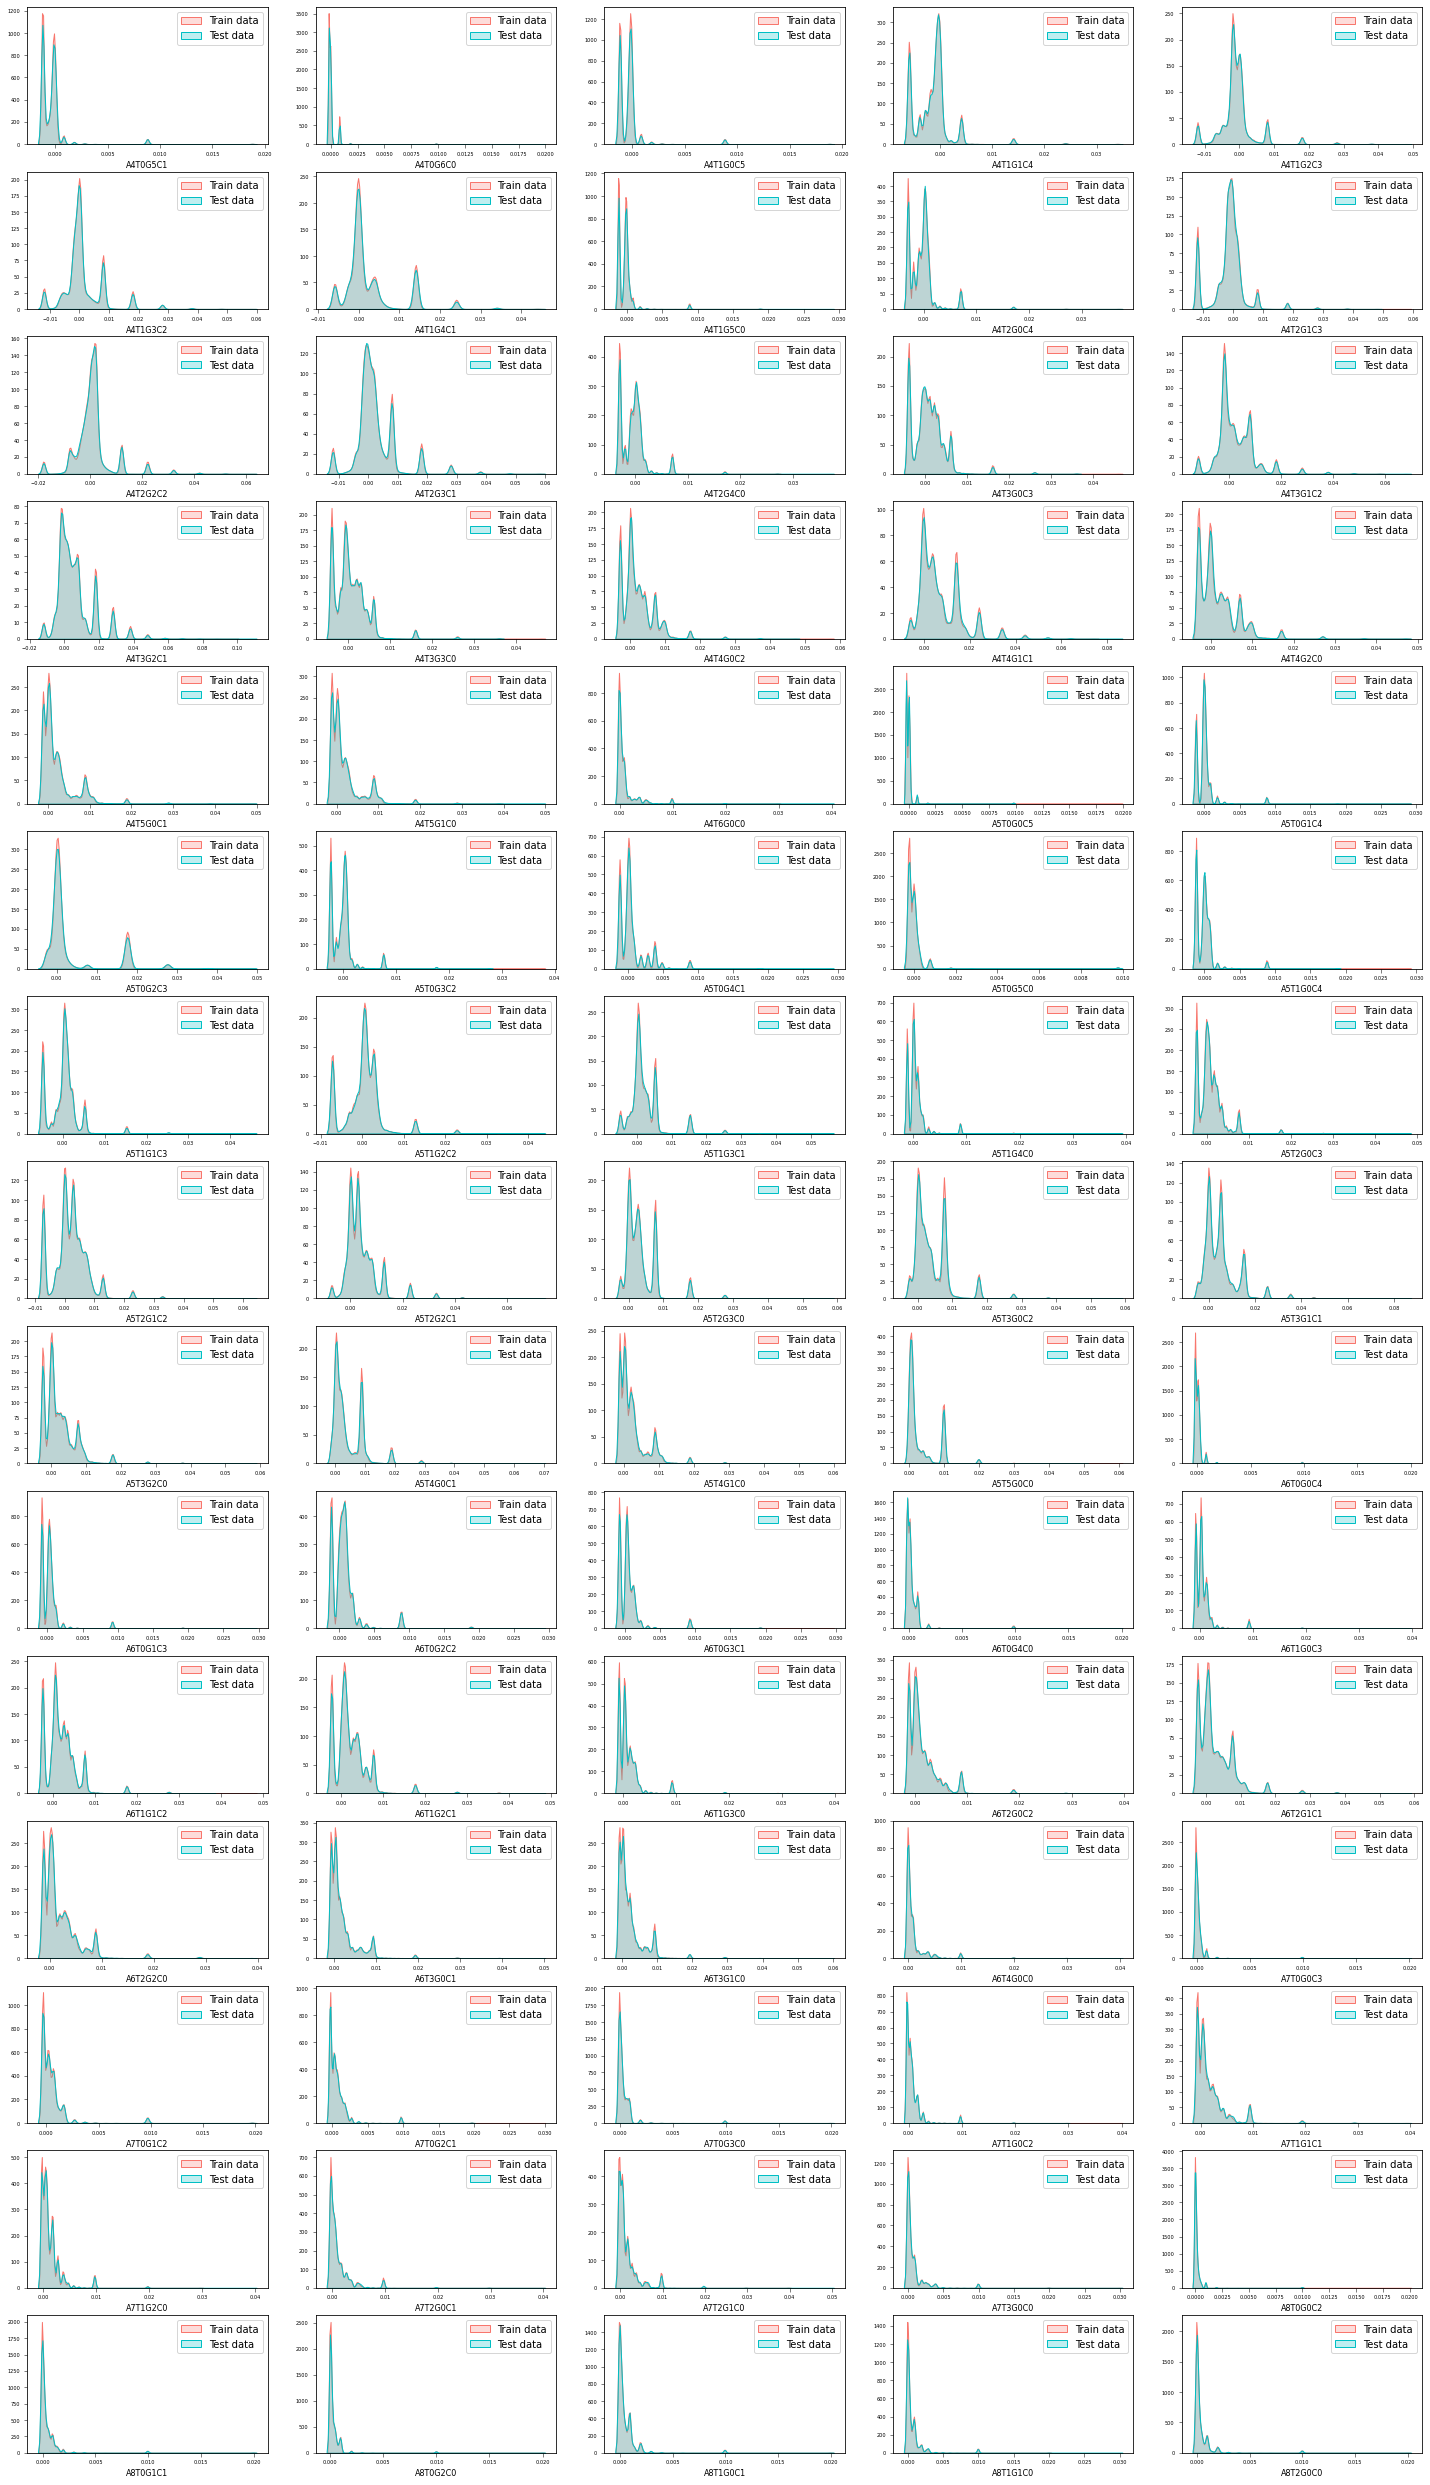

In [15]:
ncols = 5
nrows = 15
n_features = cont_features[200:]
fig, axes = plt.subplots(nrows, ncols, figsize=(25, 45))

for r in range(nrows):
    for c in range(ncols):
        col = n_features[r*ncols+c]
        sns.kdeplot(x=train[col], ax=axes[r, c], color='#F8766D', label='Train data' , fill =True )
        sns.kdeplot(x=test[col], ax=axes[r, c], color='#00BFC4', label='Test data', fill =True)
        axes[r,c].legend()
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=8)
        axes[r, c].tick_params(labelsize=5, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(6)
        axes[r, c].yaxis.offsetText.set_fontsize(4)
plt.show()

<a id="4.4"></a>
## Feature Distribution of Categorical Features

In [16]:
print(f'\033[92mNo Categorical features.')
print(f'\033[92mAll feature distribution with less than 25 unique values plotted above with continous feature distributions')
print(f'\033[94mContinous Features with their unique value count:')
for cat in cat_features:
    print(str(cat) + " -   " + str(train[cat].nunique()))

No Categorical features.
All feature distribution with less than 25 unique values plotted above with continous feature distributions
Continous Features with their unique value count:
A0T0G0C10 -   18
A0T0G1C9 -   23
A0T0G9C1 -   21
A0T0G10C0 -   14
A0T1G0C9 -   21
A0T10G0C0 -   18
A1T0G9C0 -   19
A10T0G0C0 -   22


<a id="4.5"></a>
## Target Distribution

**Observations:**
- There are 10 different target values
- All target values are equally distributed approx - `10%` of total observations for each target.

In [17]:
target_df = pd.DataFrame(train[TARGET].value_counts()).reset_index()
target_df.columns = [TARGET, 'count']
fig = px.bar(data_frame =target_df, 
             x = TARGET,
             y = 'count' , 
             color = "count",
             color_continuous_scale="Emrld") 
fig.update_layout(template = "plotly_white")
for idx,target in enumerate(target_df["target"]):
    print("\033[94mPercentage of " + str(target) + " category  : {:.2f} %".format(target_df["count"][idx] *100 / train.shape[0]))
fig.show()

Percentage of Bacteroides_fragilis category  : 10.07 %
Percentage of Streptococcus_pyogenes category  : 10.04 %
Percentage of Streptococcus_pneumoniae category  : 10.04 %
Percentage of Campylobacter_jejuni category  : 10.03 %
Percentage of Salmonella_enterica category  : 10.02 %
Percentage of Escherichia_coli category  : 9.98 %
Percentage of Enterococcus_hirae category  : 9.97 %
Percentage of Escherichia_fergusonii category  : 9.97 %
Percentage of Staphylococcus_aureus category  : 9.96 %
Percentage of Klebsiella_pneumoniae category  : 9.92 %


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="5"></a>
#  Feature Engineering

###  Basic Feature Engineering

In [18]:
train["mean"] = train[FEATURES].mean(axis=1)
train["std"] = train[FEATURES].std(axis=1)
train["min"] = train[FEATURES].min(axis=1)
train["max"] = train[FEATURES].max(axis=1)

test["mean"] = test[FEATURES].mean(axis=1)
test["std"] = test[FEATURES].std(axis=1)
test["min"] = test[FEATURES].min(axis=1)
test["max"] = test[FEATURES].max(axis=1)

FEATURES.extend(['mean', 'std', 'min', 'max'])

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="6"></a>
#  Modelling

**Observations:**
- `LGBMClassifier` , `CatBoostClassifier` and `XGBClassifier` used in modelling on 5-fold validation.
- Further Hyperparameter tuning can imporve the results.

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train[TARGET] = encoder.fit_transform(train[TARGET])

<a id="6.1"></a>
## LGBM Classifier

In [20]:
lgb_params = {
    'objective' : 'multiclass',
    'metric' : 'multi_logloss',
    'device' : 'gpu',
}


lgb_predictions = []
lgb_scores = []
lgb_fimp = []

skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=RANDOM_STATE)
for fold, (train_idx, valid_idx) in enumerate(skf.split(train[FEATURES], train[TARGET])):
    
    print(10*"=", f"Fold={fold+1}", 10*"=")
    start_time = time.time()
    
    X_train, X_valid = train.iloc[train_idx][FEATURES], train.iloc[valid_idx][FEATURES]
    y_train , y_valid = train[TARGET].iloc[train_idx] , train[TARGET].iloc[valid_idx]
    
    model = LGBMClassifier(**lgb_params)
    model.fit(X_train, y_train,verbose=0)
    
    preds_valid = model.predict(X_valid)
    acc = accuracy_score(y_valid,  preds_valid)
    lgb_scores.append(acc)
    run_time = time.time() - start_time
    
    print(f"Fold={fold+1}, Accuracy: {acc:.2f}, Run Time: {run_time:.2f}s")
    fim = pd.DataFrame(index=FEATURES,
                 data=model.feature_importances_,
                 columns=[f'{fold}_importance'])
    lgb_fimp.append(fim)
    test_preds = model.predict(test[FEATURES])
    lgb_predictions.append(test_preds)
    
print("Mean Accuracy :", np.mean(lgb_scores))

========== Fold=1 ==========
Fold=1, Accuracy: 0.98, Run Time: 63.48s
========== Fold=2 ==========
Fold=2, Accuracy: 0.98, Run Time: 58.07s
========== Fold=3 ==========
Fold=3, Accuracy: 0.98, Run Time: 58.36s
========== Fold=4 ==========
Fold=4, Accuracy: 0.98, Run Time: 58.29s
========== Fold=5 ==========
Fold=5, Accuracy: 0.98, Run Time: 58.41s
Mean Accuracy : 0.9790650000000001


### Feature Importance for LGBM Classifier (Top 15 Features)

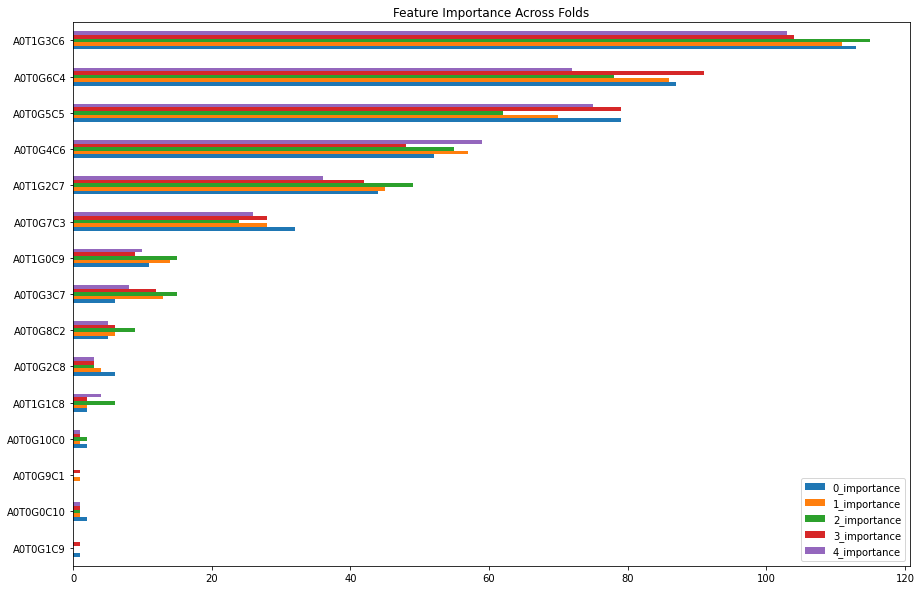

In [21]:
lgbm_fis_df = pd.concat(lgb_fimp, axis=1).head(15)
lgbm_fis_df.sort_values('1_importance').plot(kind='barh', figsize=(15, 10),
                                       title='Feature Importance Across Folds')
plt.show()

<a id="6.2"></a>
## Catboost Classifier

In [22]:
catb_params = {
    "objective": "MultiClass",
    "task_type": "GPU",
}

catb_predictions = []
catb_scores = []
catb_fimp = []

skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=RANDOM_STATE)
for fold, (train_idx, valid_idx) in enumerate(skf.split(train[FEATURES], train[TARGET])):
    
    print(10*"=", f"Fold={fold+1}", 10*"=")
    start_time = time.time()
    
    X_train, X_valid = train.iloc[train_idx][FEATURES], train.iloc[valid_idx][FEATURES]
    y_train , y_valid = train[TARGET].iloc[train_idx] , train[TARGET].iloc[valid_idx]
    
    model = CatBoostClassifier(**catb_params)
    model.fit(X_train, y_train,verbose=0)
    
    preds_valid = model.predict(X_valid)
    acc = accuracy_score(y_valid,  preds_valid)
    catb_scores.append(acc)
    run_time = time.time() - start_time
    
    print(f"Fold={fold+1}, Accuracy: {acc:.2f}, Run Time: {run_time:.2f}s")
    fim = pd.DataFrame(index=FEATURES,
                 data=model.feature_importances_,
                 columns=[f'{fold}_importance'])
    catb_fimp.append(fim)
    test_preds = model.predict(test[FEATURES])
    catb_predictions.append(test_preds)
    
print("Mean Accuracy :", np.mean(catb_scores))

========== Fold=1 ==========
Fold=1, Accuracy: 0.99, Run Time: 95.41s
========== Fold=2 ==========
Fold=2, Accuracy: 0.99, Run Time: 25.51s
========== Fold=3 ==========
Fold=3, Accuracy: 0.99, Run Time: 24.89s
========== Fold=4 ==========
Fold=4, Accuracy: 0.99, Run Time: 25.66s
========== Fold=5 ==========
Fold=5, Accuracy: 0.99, Run Time: 25.75s
Mean Accuracy : 0.98652


### Feature Importance for Catboost Classifier (Top 15 Features)

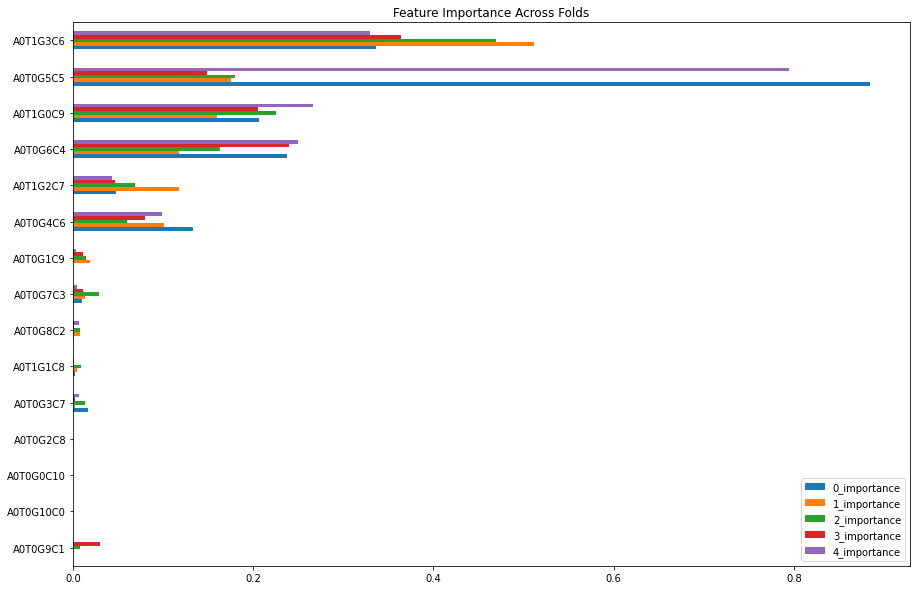

In [23]:
catb_fis_df = pd.concat(catb_fimp, axis=1).head(15)
catb_fis_df.sort_values('1_importance').plot(kind='barh', figsize=(15, 10),
                                       title='Feature Importance Across Folds')
plt.show()

<a id="6.3"></a>
## XGBoost Classifier

In [24]:
xgb_params = {
    'objective': 'multi:softmax',
    'eval_metric': 'mlogloss',
    'tree_method': 'gpu_hist',
    'predictor': 'gpu_predictor',
    }


xgb_predictions = []
xgb_scores = []
xgb_fimp = []

skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=RANDOM_STATE)
for fold, (train_idx, valid_idx) in enumerate(skf.split(train[FEATURES], train[TARGET])):
    
    print(10*"=", f"Fold={fold+1}", 10*"=")
    start_time = time.time()
    
    X_train, X_valid = train.iloc[train_idx][FEATURES], train.iloc[valid_idx][FEATURES]
    y_train , y_valid = train[TARGET].iloc[train_idx] , train[TARGET].iloc[valid_idx]
    
    model = XGBClassifier(**xgb_params)
    model.fit(X_train, y_train,verbose=0)
    
    preds_valid = model.predict(X_valid)
    acc = accuracy_score(y_valid,  preds_valid)
    xgb_scores.append(acc)
    run_time = time.time() - start_time
    
    print(f"Fold={fold+1}, Accuracy: {acc:.2f}, Run Time: {run_time:.2f}s")
    test_preds = model.predict(test[FEATURES])
    fim = pd.DataFrame(index=FEATURES,
                 data=model.feature_importances_,
                 columns=[f'{fold}_importance'])
    xgb_fimp.append(fim)
    xgb_predictions.append(test_preds)
    
print("Mean Accuracy :", np.mean(xgb_scores))

========== Fold=1 ==========
Fold=1, Accuracy: 0.98, Run Time: 16.67s
========== Fold=2 ==========
Fold=2, Accuracy: 0.98, Run Time: 14.71s
========== Fold=3 ==========
Fold=3, Accuracy: 0.99, Run Time: 14.92s
========== Fold=4 ==========
Fold=4, Accuracy: 0.98, Run Time: 14.79s
========== Fold=5 ==========
Fold=5, Accuracy: 0.98, Run Time: 15.21s
Mean Accuracy : 0.9845900000000001


### Feature Importance for XGBoost Classifier (Top 15 Features)

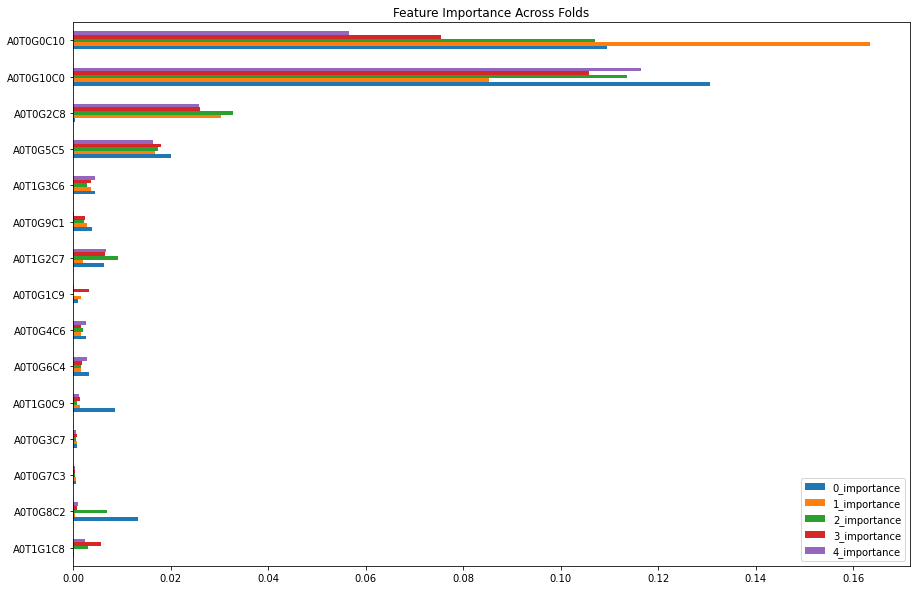

In [25]:
xgb_fis_df = pd.concat(xgb_fimp, axis=1).head(15)
xgb_fis_df.sort_values('1_importance').plot(kind='barh', figsize=(15, 10),
                                       title='Feature Importance Across Folds')
plt.show()

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="6"></a>
#  Submission

### LGBM Classifier Submission

In [26]:
lgb_submission = submission.copy()
lgb_submission["target"] = encoder.inverse_transform(np.squeeze(mode(np.column_stack(lgb_predictions),axis = 1)[0]).astype('int'))
lgb_submission.to_csv("lgb-subs.csv",index=False)
lgb_submission.head()

,row_id,target
0,200000,Escherichia_fergusonii
1,200001,Salmonella_enterica
2,200002,Enterococcus_hirae
3,200003,Salmonella_enterica
4,200004,Staphylococcus_aureus


### Catboost Classifier Submission

In [27]:
catb_submission = submission.copy()
catb_submission["target"] = encoder.inverse_transform(np.squeeze(mode(np.column_stack(catb_predictions),axis = 1)[0]).astype('int'))
catb_submission.to_csv("catb-subs.csv",index=False)
catb_submission.head()

,row_id,target
0,200000,Escherichia_fergusonii
1,200001,Salmonella_enterica
2,200002,Enterococcus_hirae
3,200003,Salmonella_enterica
4,200004,Staphylococcus_aureus


### XGBoost Classifier Submission

In [28]:
xgb_submission = submission.copy()
xgb_submission["target"] = encoder.inverse_transform(np.squeeze(mode(np.column_stack(xgb_predictions),axis = 1)[0]).astype('int'))
xgb_submission.to_csv("xgb-subs.csv",index=False)
xgb_submission.head()

,row_id,target
0,200000,Escherichia_fergusonii
1,200001,Salmonella_enterica
2,200002,Enterococcus_hirae
3,200003,Salmonella_enterica
4,200004,Staphylococcus_aureus


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

### <center>Thank you for reading🙂</center>
### <center>If you have any feedback or find anything wrong, please let me know!</center>
